# Определение перспективного тарифа для телеком компании

Компания «Мегалайн» — федеральный оператор сотовой связи. Они предлагают клиентам два тарифных плана: «Смарт» и «Ультра». 
## Цель проекта
Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. Представлены данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов
<ul style="border:solid black 2px; padding: 20px">
    <b>Тариф «Смарт»</b>
    <li>Ежемесячная плата: 550 рублей</li>
    <li>Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика</li>
    <li>Стоимость услуг сверх тарифного пакета:
        <dl>
          <dt>минута разговора: 3 рубля</dt>
          <dt>сообщение: 3 рубля</dt>
          <dt>1 Гб интернет-трафика: 200 рублей</dt>
        </dl>
    </li>
</ul>    
<ul style="border:solid black 2px; padding: 20px">
    <b>Тариф «Ультра»</b>
    <li>Ежемесячная плата: 1950 рублей</li>
    <li>Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика</li>
    <li>Стоимость услуг сверх тарифного пакета:
        <dl>
          <dt>минута разговора: 1 рубль</dt>
          <dt>сообщение: 1 рубль</dt>
          <dt>1 Гб интернет-трафика: 150 рублей</dt>
        </dl>
    </li>
</ul>
<b><u>Обратите внимание</u></b>: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

## Описание данных
<ul style="border:solid black 2px; padding: 20px">
    <b>Таблица users (информация о пользователях):</b>
    <li><i>user_id</i> — уникальный идентификатор пользователя</li>
    <li><i>first_name</i> — имя пользователя</li>
    <li><i>last_name</i> — фамилия пользователя</li>
    <li><i>age</i> — возраст пользователя (годы)</li>
    <li><i>reg_date</i> — дата подключения тарифа (день, месяц, год)</li>
    <li><i>churn_date</i> — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)</li>
    <li><i>city</i> — город проживания пользователя</li>
    <li><i>tariff</i> — название тарифного плана</li>
</ul>
<ul style="border:solid black 2px; padding: 20px">
    <b>Таблица calls (информация о звонках):</b>
    <li><i>id</i> — уникальный номер звонка</li>
    <li><i>call_date</i> — дата звонка</li>
    <li><i>duration</i> — длительность звонка в минутах</li>
    <li><i>user_id</i> — идентификатор пользователя, сделавшего звонок</li>
</ul>
<ul style="border:solid black 2px; padding: 20px">
    <b>Таблица messages (информация о сообщениях):</b>
    <li><i>id</i> — уникальный номер сообщения</li>
    <li><i>message_date</i> — дата сообщения</li>
    <li><i>user_id</i> — идентификатор пользователя, отправившего сообщение</li>
</ul>
<ul style="border:solid black 2px; padding: 20px">
    <b>Таблица internet (информация об интернет-сессиях):</b>
    <li><i>id</i> — уникальный номер сессии</li>
    <li><i>mb_used</i> — объём потраченного за сессию интернет-трафика (в мегабайтах)</li>
    <li><i>session_date</i> — дата интернет-сессии</li>
    <li><i>user_id</i> — идентификатор пользователя</li>
</ul>
<ul style="border:solid black 2px; padding: 20px">
    <b>Таблица tariffs (информация о тарифах):</b>
    <li><i>tariff_name</i> — название тарифа</li>
    <li><i>rub_monthly_fee</i> — ежемесячная абонентская плата в рублях</li>
    <li><i>minutes_included</i> — количество минут разговора в месяц, включённых в абонентскую плату</li>
    <li><i>messages_included</i> — количество сообщений в месяц, включённых в абонентскую плату</li>
    <li><i>mb_per_month_included</i> — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)</li>
    <li><i>rub_per_minute</i> — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)</li>
    <li><i>rub_per_message</i> — стоимость отправки сообщения сверх тарифного пакета</li>
    <li><i>rub_per_gb</i> — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)</li>
</ul>


## Шаг 1. Откроем файлы с данными и изучим общую информацию

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats as st

In [ ]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [ ]:
# <приведем формат к читабельному виду>
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
display(calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


<b>Нужно разобраться с нулевыми значниями столбца <i>'duration'</i></b>

In [ ]:
calls.describe()

,duration,user_id
count,202607.00,202607.00
mean,6.76,1253.94
std,5.84,144.72
min,0.00,1000.00
25%,1.30,1126.00
50%,6.00,1260.00
75%,10.70,1379.00
max,38.00,1499.00


In [ ]:
print(calls.duplicated().sum())

0


In [ ]:
display(internet)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


<b>Видимо лишний столбец <i>'Unnamed'</i></b>

In [ ]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.00,149396.00,149396.00
mean,74697.50,370.19,1252.10
std,43127.05,278.30,144.05
min,0.00,0.00,1000.00
25%,37348.75,138.19,1130.00
50%,74697.50,348.01,1251.00
75%,112046.25,559.55,1380.00
max,149395.00,1724.83,1499.00


In [ ]:
print(internet.duplicated().sum())

0


In [ ]:
display(messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [ ]:
messages.describe()

,user_id
count,123036.00
mean,1256.99
std,143.52
min,1000.00
25%,1134.00
50%,1271.00
75%,1381.00
max,1499.00


In [ ]:
print(messages.duplicated().sum())

0


In [ ]:
display(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
display(users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [ ]:
users.describe()

,user_id,age
count,500.00,500.00
mean,1249.50,46.59
std,144.48,16.67
min,1000.00,18.00
25%,1124.75,32.00
50%,1249.50,46.00
75%,1374.25,62.00
max,1499.00,75.00


In [ ]:
print(users.duplicated().sum())

0


In [ ]:
users.isnull().sum()*100 / len(users)

user_id       0.00
age           0.00
churn_date   92.40
city          0.00
first_name    0.00
last_name     0.00
reg_date      0.00
tariff        0.00
dtype: float64

<b>Много пустых значений в столбце <i>'churn_date'</i>, но в описании говорилось, что если значение пропущено, то тариф еще действует.</b>

### Просмотрим общую информацию по каждому датасету

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


<b>Столбцы <i>'churn_date'</i> и <i>'reg_date'</i> нужно привести к типу <u>datetime</u></b>

In [ ]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


<b>Столбец <i>'call_date'</i> нужно привести к типу <u>datetime</u>, столбец <i>'id'</i> к типу <u>int</u></b>

In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


<b>Столбец <i>'session_date'</i> нужно привести к типу <u>datetime</u>, столбец <i>'id'</i> к типу <u>int</u>, а столбец <i>'Unnamed: 0'</i> удалить(дублирует <i>'id'</i>)</b>

In [ ]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


<b>Столбец <i>'message_date'</i> нужно привести к типу <u>datetime</u>, столбец <i>'id'</i> к типу <u>int</u></b>

In [ ]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


### Вывод:
На данном этапе выявленны следующие проблемы, которые необходимо решить:
1. Необходимо разобраться с нулевыми значениями датасета <b><u>calls</u></b> в столбце <b>'duration'</b>.
2. Во всех датасетах, где это необходимо, привести данные к нужным типам.
3. В датасете <b><u>internet</u></b> лишний столбец <b>'Unnamed: 0'</b>.
4. В датасете <b><u>internet</u></b> нужно округлить вверх значения в столбце <b>'mb_used'</b> и перевести объем потраченного интернета из Мб в Гб.

## Шаг 2. Предобработка данных

<b>Приведем к типу datetime cтолбцы 'churn_date' и 'reg_date' в датасете users</b>

In [ ]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')
#users['churn_date'] = pd.to_datetime(users['churn_date']).apply(lambda x: x.date())

In [ ]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = "%Y-%m-%d")

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


<b>Приведем к типу datetime cтолбец 'call_date', а 'id' к типу int в датасете calls. Также разберемся с нулевыми значениями столбца 'duration' и приведем к типу int, так как у компании условие, что округляются значения вверх до минуты. Предположим, что нулевые звонки, не совсем нулевые, длились секунду, но система не доработана, при выгрузки данных округлились до 0, а не до 1. Поэтому заменим 0 на 1.</b>

In [ ]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = "%Y-%m-%d")

In [ ]:
calls['id'] = calls['id'].astype('int')

In [ ]:
calls['duration'] = np.ceil(calls['duration']).astype('int')

In [ ]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null int64
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.2 MB


In [ ]:
calls['duration'] = calls['duration'].replace(0,1)

In [ ]:
display(calls)

,id,call_date,duration,user_id
0,10000,2018-07-25,1,1000
1,10001,2018-08-17,1,1000
2,10002,2018-06-11,3,1000
3,10003,2018-09-21,14,1000
4,10004,2018-12-15,6,1000
...,...,...,...,...
202602,1499215,2018-12-26,1,1499
202603,1499216,2018-10-18,19,1499
202604,1499217,2018-11-10,11,1499
202605,1499218,2018-10-06,5,1499


<b>Приведем к типу datetime cтолбец 'message_date', а 'id' к типу int в датасете messages</b>

In [ ]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = "%Y-%m-%d")

In [ ]:
messages['id'] = messages['id'].astype('int')

In [ ]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null int64
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.8 MB


<b>Приведем к типу datetime cтолбец 'session_date', а 'id' к типу int в датасете internet. Также округлим вверх значения столбца 'mb_used', так как у компании условие, что округляются значения вверх до мегабайта и пере.</b>

In [ ]:
display(internet)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [ ]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = "%Y-%m-%d")

In [ ]:
internet['id'] = internet['id'].astype('int')

In [ ]:
internet['mb_used'] = np.ceil(internet['mb_used'])

In [ ]:
display(internet)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,10000,113.00,2018-11-25,1000
1,1,10001,1053.00,2018-09-07,1000
2,2,10002,1198.00,2018-06-25,1000
3,3,10003,551.00,2018-08-22,1000
4,4,10004,303.00,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499152,319.00,2018-10-03,1499
149392,149392,1499153,491.00,2018-12-14,1499
149393,149393,1499154,0.00,2018-10-27,1499
149394,149394,1499155,1247.00,2018-11-26,1499


In [ ]:
# <переведем в Гб> 
internet['mb_used'] = internet['mb_used'] / 1024

In [ ]:
internet = internet.rename(columns = {'mb_used':'gb_used'})

In [ ]:
display(internet)

,Unnamed: 0,id,gb_used,session_date,user_id
0,0,10000,0.11,2018-11-25,1000
1,1,10001,1.03,2018-09-07,1000
2,2,10002,1.17,2018-06-25,1000
3,3,10003,0.54,2018-08-22,1000
4,4,10004,0.30,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499152,0.31,2018-10-03,1499
149392,149392,1499153,0.48,2018-12-14,1499
149393,149393,1499154,0.00,2018-10-27,1499
149394,149394,1499155,1.22,2018-11-26,1499


In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null int64
gb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 5.7 MB


<b>Удалим столбец 'Unnamed: 0' в датасете internet</b>

In [ ]:
internet = internet.drop('Unnamed: 0', 1)

In [ ]:
display(internet)

,id,gb_used,session_date,user_id
0,10000,0.11,2018-11-25,1000
1,10001,1.03,2018-09-07,1000
2,10002,1.17,2018-06-25,1000
3,10003,0.54,2018-08-22,1000
4,10004,0.30,2018-09-24,1000
...,...,...,...,...
149391,1499152,0.31,2018-10-03,1499
149392,1499153,0.48,2018-12-14,1499
149393,1499154,0.00,2018-10-27,1499
149394,1499155,1.22,2018-11-26,1499


<b>Переведем 'mb_per_month_included' Гб</b>

In [ ]:
display(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included'] / 1024

In [ ]:
tariffs= tariffs.rename(columns = {'mb_per_month_included':'gb_per_month_included'})

In [ ]:
display(tariffs)

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.00,500,550,200,3,3,smart
1,1000,30.00,3000,1950,150,1,1,ultra


### Посчитаем для каждого пользователя:

<ul style="border:solid black 2px; padding: 20px">
    <li>Количество сделанных звонков и израсходованных минут разговора по месяцам;</li>
</ul> 

In [ ]:
display(calls)

,id,call_date,duration,user_id
0,10000,2018-07-25,1,1000
1,10001,2018-08-17,1,1000
2,10002,2018-06-11,3,1000
3,10003,2018-09-21,14,1000
4,10004,2018-12-15,6,1000
...,...,...,...,...
202602,1499215,2018-12-26,1,1499
202603,1499216,2018-10-18,19,1499
202604,1499217,2018-11-10,11,1499
202605,1499218,2018-10-06,5,1499


In [ ]:
#calls['month'] = calls['call_date'].dt.month_name()
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [ ]:
display(calls)

,id,call_date,duration,user_id,month
0,10000,2018-07-25,1,1000,7
1,10001,2018-08-17,1,1000,8
2,10002,2018-06-11,3,1000,6
3,10003,2018-09-21,14,1000,9
4,10004,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499215,2018-12-26,1,1499,12
202603,1499216,2018-10-18,19,1499,10
202604,1499217,2018-11-10,11,1499,11
202605,1499218,2018-10-06,5,1499,10


In [ ]:
#user_calls = calls.pivot_table(index = ['user_id','call_month'],values = ['duration', 'id'], aggfunc = {'duration':'sum', 'id':'count'}).reset_index().rename(columns={'duration':'total_duration', 'id':'total_calls'})
users_calls = calls.groupby(['user_id','month']).agg({'duration':'sum', 'id':'count'}).reset_index().rename(columns={'duration':'total_duration', 'id':'total_calls'})

In [ ]:
#display(user_calls)
display(users_calls)

,user_id,month,total_duration,total_calls
0,1000,5,164,22
1,1000,6,187,43
2,1000,7,346,47
3,1000,8,418,52
4,1000,9,478,58
...,...,...,...,...
3169,1498,10,258,41
3170,1499,9,71,9
3171,1499,10,473,68
3172,1499,11,624,74


<ul style="border:solid black 2px; padding: 20px">
    <li>Количество отправленных сообщений по месяцам;</li>
</ul> 

In [ ]:
display(messages)

,id,message_date,user_id
0,10000,2018-06-27,1000
1,10001,2018-10-08,1000
2,10002,2018-08-04,1000
3,10003,2018-06-16,1000
4,10004,2018-12-05,1000
...,...,...,...
123031,1499179,2018-12-12,1499
123032,1499180,2018-09-28,1499
123033,1499181,2018-09-27,1499
123034,1499182,2018-11-15,1499


In [ ]:
#messages['month'] = messages['message_date'].dt.month_name()
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [ ]:
display(messages)

,id,message_date,user_id,month
0,10000,2018-06-27,1000,6
1,10001,2018-10-08,1000,10
2,10002,2018-08-04,1000,8
3,10003,2018-06-16,1000,6
4,10004,2018-12-05,1000,12
...,...,...,...,...
123031,1499179,2018-12-12,1499,12
123032,1499180,2018-09-28,1499,9
123033,1499181,2018-09-27,1499,9
123034,1499182,2018-11-15,1499,11


In [ ]:
#user_messages = messages.pivot_table(index = ['user_id','message_month'],values = ['id'], aggfunc = {'id':'count'}).reset_index().rename(columns={'id':'total_messages'})
users_messages = messages.groupby(['user_id','month']).agg({'id':'count'}).reset_index().rename(columns={'id':'total_messages'})

In [ ]:
#display(user_messages)
display(users_messages)

,user_id,month,total_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


<ul style="border:solid black 2px; padding: 20px">
    <li>Объем израсходованного интернет-трафика по месяцам;</li>
</ul> 

In [ ]:
display(internet)

,id,gb_used,session_date,user_id
0,10000,0.11,2018-11-25,1000
1,10001,1.03,2018-09-07,1000
2,10002,1.17,2018-06-25,1000
3,10003,0.54,2018-08-22,1000
4,10004,0.30,2018-09-24,1000
...,...,...,...,...
149391,1499152,0.31,2018-10-03,1499
149392,1499153,0.48,2018-12-14,1499
149393,1499154,0.00,2018-10-27,1499
149394,1499155,1.22,2018-11-26,1499


In [ ]:
#internet["month"] = internet['session_date'].dt.month_name()
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [ ]:
display(internet)

,id,gb_used,session_date,user_id,month
0,10000,0.11,2018-11-25,1000,11
1,10001,1.03,2018-09-07,1000,9
2,10002,1.17,2018-06-25,1000,6
3,10003,0.54,2018-08-22,1000,8
4,10004,0.30,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499152,0.31,2018-10-03,1499,10
149392,1499153,0.48,2018-12-14,1499,12
149393,1499154,0.00,2018-10-27,1499,10
149394,1499155,1.22,2018-11-26,1499,11


In [ ]:
#user_internet = internet.pivot_table(index = ['user_id','session_month'],values = ['mb_used'], aggfunc = {'mb_used':'sum'}).reset_index().rename(columns={'mb_used':'total_mb_used'})
users_internet = internet.groupby(['user_id','month']).agg({'gb_used':'sum'}).reset_index().rename(columns={'gb_used':'total_gb_used'})

In [ ]:
#display(user_internet)
display(users_internet)

,user_id,month,total_gb_used
0,1000,5,2.20
1,1000,6,22.71
2,1000,7,13.69
3,1000,8,13.74
4,1000,9,14.24
...,...,...,...
3198,1498,10,20.12
3199,1499,9,1.80
3200,1499,10,17.39
3201,1499,11,17.56


<ul style="border:solid black 2px; padding: 20px">
    <li>Помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).</li>
</ul> 

<b>Для данного раздела необходимо склеить сгруппированные нами таблицы в одну. Для этого применим метод merge()</b>

In [ ]:
df = users_calls.merge(users_messages, on = ['user_id','month'], how = 'outer')
display(df)

,user_id,month,total_duration,total_calls,total_messages
0,1000,5,164.00,22.00,22.00
1,1000,6,187.00,43.00,60.00
2,1000,7,346.00,47.00,75.00
3,1000,8,418.00,52.00,81.00
4,1000,9,478.00,58.00,57.00
...,...,...,...,...,...
3208,1489,8,nan,nan,17.00
3209,1489,9,nan,nan,32.00
3210,1489,10,nan,nan,21.00
3211,1489,11,nan,nan,20.00


In [ ]:
df = df.merge(users_internet, on = ['user_id','month'], how = 'outer')
display(df)

,user_id,month,total_duration,total_calls,total_messages,total_gb_used
0,1000,5,164.00,22.00,22.00,2.20
1,1000,6,187.00,43.00,60.00,22.71
2,1000,7,346.00,47.00,75.00,13.69
3,1000,8,418.00,52.00,81.00,13.74
4,1000,9,478.00,58.00,57.00,14.24
...,...,...,...,...,...,...
3209,1489,9,nan,nan,32.00,16.83
3210,1489,10,nan,nan,21.00,19.13
3211,1489,11,nan,nan,20.00,17.11
3212,1489,12,nan,nan,35.00,16.93


<b>К полученой таблице склеим таблицу users и tariffs</b>

In [ ]:
# <в итоговую таблицу включим id из левой таблицы>
df = df.merge(users, on = 'user_id', how = 'left')
display(df)

,user_id,month,total_duration,total_calls,total_messages,total_gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,164.00,22.00,22.00,2.20,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,187.00,43.00,60.00,22.71,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,346.00,47.00,75.00,13.69,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,418.00,52.00,81.00,13.74,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,478.00,58.00,57.00,14.24,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,nan,nan,32.00,16.83,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3210,1489,10,nan,nan,21.00,19.13,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3211,1489,11,nan,nan,20.00,17.11,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,12,nan,nan,35.00,16.93,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


In [ ]:
display(tariffs)

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.00,500,550,200,3,3,smart
1,1000,30.00,3000,1950,150,1,1,ultra


In [ ]:
# <переименуем название столбца 'tariff_name', по нему будем склеивать таблицы>
tariffs = tariffs.rename(columns = {'tariff_name':'tariff'})

In [ ]:
print(tariffs.columns)

Index(['messages_included', 'gb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff'],
      dtype='object')


In [ ]:
df = df.merge(tariffs, on = 'tariff', how = 'left')
display(df)

,user_id,month,total_duration,total_calls,total_messages,total_gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,164.00,22.00,22.00,2.20,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.00,3000,1950,150,1,1
1,1000,6,187.00,43.00,60.00,22.71,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.00,3000,1950,150,1,1
2,1000,7,346.00,47.00,75.00,13.69,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.00,3000,1950,150,1,1
3,1000,8,418.00,52.00,81.00,13.74,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.00,3000,1950,150,1,1
4,1000,9,478.00,58.00,57.00,14.24,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.00,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,nan,nan,32.00,16.83,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15.00,500,550,200,3,3
3210,1489,10,nan,nan,21.00,19.13,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15.00,500,550,200,3,3
3211,1489,11,nan,nan,20.00,17.11,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15.00,500,550,200,3,3
3212,1489,12,nan,nan,35.00,16.93,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15.00,500,550,200,3,3


In [ ]:
print(df.isnull().sum())

user_id                     0
month                       0
total_duration             40
total_calls                40
total_messages            497
total_gb_used              11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
gb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64


<b>Заменим пустые значения в столбцах 'total_duration', 'total_calls', 'total_messages', 'total_gb_used' на 0. так как возможно пользователями не использовались данные услуги</b>

In [ ]:
df['total_duration'] = df['total_duration'].fillna(0)

In [ ]:
df['total_calls'] = df['total_calls'].fillna(0)

In [ ]:
df['total_messages'] = df['total_messages'].fillna(0)

In [ ]:
df['total_gb_used'] = df['total_gb_used'].fillna(0)

In [ ]:
print(df.isnull().sum())

user_id                     0
month                       0
total_duration              0
total_calls                 0
total_messages              0
total_gb_used               0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
gb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
display(df)

,user_id,month,total_duration,total_calls,total_messages,total_gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,164.00,22.00,22.00,2.20,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.00,3000,1950,150,1,1
1,1000,6,187.00,43.00,60.00,22.71,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.00,3000,1950,150,1,1
2,1000,7,346.00,47.00,75.00,13.69,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.00,3000,1950,150,1,1
3,1000,8,418.00,52.00,81.00,13.74,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.00,3000,1950,150,1,1
4,1000,9,478.00,58.00,57.00,14.24,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.00,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.00,0.00,32.00,16.83,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15.00,500,550,200,3,3
3210,1489,10,0.00,0.00,21.00,19.13,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15.00,500,550,200,3,3
3211,1489,11,0.00,0.00,20.00,17.11,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15.00,500,550,200,3,3
3212,1489,12,0.00,0.00,35.00,16.93,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15.00,500,550,200,3,3


In [ ]:
def total_excess_tariff(row):
    calls_proceeds = (row['total_duration'] - row['minutes_included']) * row['rub_per_minute']
    messages_proceeds = (row['total_messages'] - row['messages_included']) * row['rub_per_message']
    internet_proceeds = (row['total_gb_used'] - row['gb_per_month_included']) * row['rub_per_gb']
    total = 0
    for i in [calls_proceeds, messages_proceeds, internet_proceeds]:
        if i > 0:
            total += i
    return total

In [ ]:
df['total_excess_tariff'] = df.apply(lambda x: total_excess_tariff(x), axis = 1)

In [ ]:
df['total_proceeds'] = df['total_excess_tariff'] + df['rub_monthly_fee']

In [ ]:
display(df.sort_values(by = 'total_proceeds', ascending = False))

,user_id,month,total_duration,total_calls,total_messages,total_gb_used,age,churn_date,city,first_name,...,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_excess_tariff,total_proceeds
3106,1486,12,1025.00,133.00,83.00,37.71,35,NaT,Нижний Новгород,Матвей,...,smart,50,15.00,500,550,200,3,3,6215.02,6765.02
1622,1261,12,1102.00,141.00,22.00,31.93,46,NaT,Казань,Мадина,...,smart,50,15.00,500,550,200,3,3,5192.13,5742.13
260,1042,12,755.00,121.00,75.00,36.35,42,NaT,Хабаровск,Константин,...,smart,50,15.00,500,550,200,3,3,5109.34,5659.34
3105,1486,11,788.00,108.00,96.00,35.47,35,NaT,Нижний Новгород,Матвей,...,smart,50,15.00,500,550,200,3,3,5095.55,5645.55
1793,1286,12,751.00,95.00,68.00,34.33,19,NaT,Москва,Рашид,...,smart,50,15.00,500,550,200,3,3,4672.43,5222.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,1221,11,356.00,46.00,26.00,8.19,40,NaT,Белгород,Джемма,...,smart,50,15.00,500,550,200,3,3,0.00,550.00
1395,1221,10,278.00,34.00,38.00,8.71,40,NaT,Белгород,Джемма,...,smart,50,15.00,500,550,200,3,3,0.00,550.00
1394,1221,9,209.00,26.00,19.00,11.08,40,NaT,Белгород,Джемма,...,smart,50,15.00,500,550,200,3,3,0.00,550.00
2479,1393,2,180.00,26.00,16.00,6.29,56,NaT,Краснодар,Артём,...,smart,50,15.00,500,550,200,3,3,0.00,550.00


### Вывод:
1. Привели данные к нужным типам, нашли и исправили ошибки в данных.
2. Сгруппировали таблицы по заданным признакам и склеили в одну, также рассчитали дополнительные параметры, чтобы осуществить дальнейший анализ.

## Шаг 3. Проанализируем данные

In [ ]:
print(df['tariff'].value_counts())

smart    2229
ultra     985
Name: tariff, dtype: int64


<b>Разобьем df по тарифу на две выборки</b>

In [ ]:
smart_df = df.query('tariff == "smart"')
display(smart_df)

,user_id,month,total_duration,total_calls,total_messages,total_gb_used,age,churn_date,city,first_name,...,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_excess_tariff,total_proceeds
8,1001,11,444.00,59.00,0.00,18.02,41,NaT,Москва,Иван,...,smart,50,15.00,500,550,200,3,3,603.91,1153.91
9,1001,12,430.00,63.00,0.00,13.72,41,NaT,Москва,Иван,...,smart,50,15.00,500,550,200,3,3,0.00,550.00
10,1002,6,118.00,15.00,4.00,10.62,59,NaT,Стерлитамак,Евгений,...,smart,50,15.00,500,550,200,3,3,0.00,550.00
11,1002,7,219.00,26.00,11.00,17.19,59,NaT,Стерлитамак,Евгений,...,smart,50,15.00,500,550,200,3,3,437.70,987.70
12,1002,8,294.00,42.00,13.00,19.87,59,NaT,Стерлитамак,Евгений,...,smart,50,15.00,500,550,200,3,3,974.02,1524.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208,1489,8,0.00,0.00,17.00,10.81,35,NaT,Санкт-Петербург,Павел,...,smart,50,15.00,500,550,200,3,3,0.00,550.00
3209,1489,9,0.00,0.00,32.00,16.83,35,NaT,Санкт-Петербург,Павел,...,smart,50,15.00,500,550,200,3,3,365.62,915.62
3210,1489,10,0.00,0.00,21.00,19.13,35,NaT,Санкт-Петербург,Павел,...,smart,50,15.00,500,550,200,3,3,825.78,1375.78
3211,1489,11,0.00,0.00,20.00,17.11,35,NaT,Санкт-Петербург,Павел,...,smart,50,15.00,500,550,200,3,3,421.09,971.09


In [ ]:
smart_df[['total_duration','total_messages','total_gb_used','total_excess_tariff','total_proceeds']].describe()

,total_duration,total_messages,total_gb_used,total_excess_tariff,total_proceeds
count,2229.00,2229.00,2229.00,2229.00,2229.00
mean,429.45,33.38,15.85,700.33,1250.33
std,194.87,28.23,5.74,797.03,797.03
min,0.00,0.00,0.00,0.00,550.00
25%,291.00,10.00,12.36,3.00,553.00
50%,435.00,28.00,16.14,436.49,986.49
75%,560.00,51.00,19.60,1151.56,1701.56
max,1471.00,143.00,37.71,6215.02,6765.02


In [ ]:
ultra_df = df.query('tariff == "ultra"')
display(ultra_df)

,user_id,month,total_duration,total_calls,total_messages,total_gb_used,age,churn_date,city,first_name,...,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_excess_tariff,total_proceeds
0,1000,5,164.00,22.00,22.00,2.20,52,NaT,Краснодар,Рафаил,...,ultra,1000,30.00,3000,1950,150,1,1,0.00,1950.00
1,1000,6,187.00,43.00,60.00,22.71,52,NaT,Краснодар,Рафаил,...,ultra,1000,30.00,3000,1950,150,1,1,0.00,1950.00
2,1000,7,346.00,47.00,75.00,13.69,52,NaT,Краснодар,Рафаил,...,ultra,1000,30.00,3000,1950,150,1,1,0.00,1950.00
3,1000,8,418.00,52.00,81.00,13.74,52,NaT,Краснодар,Рафаил,...,ultra,1000,30.00,3000,1950,150,1,1,0.00,1950.00
4,1000,9,478.00,58.00,57.00,14.24,52,NaT,Краснодар,Рафаил,...,ultra,1000,30.00,3000,1950,150,1,1,0.00,1950.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204,1473,9,0.00,0.00,19.00,16.90,18,NaT,Красноярск,Николай,...,ultra,1000,30.00,3000,1950,150,1,1,0.00,1950.00
3205,1473,10,0.00,0.00,20.00,13.38,18,NaT,Красноярск,Николай,...,ultra,1000,30.00,3000,1950,150,1,1,0.00,1950.00
3206,1473,11,0.00,0.00,14.00,21.18,18,NaT,Красноярск,Николай,...,ultra,1000,30.00,3000,1950,150,1,1,0.00,1950.00
3207,1473,12,0.00,0.00,20.00,18.00,18,NaT,Красноярск,Николай,...,ultra,1000,30.00,3000,1950,150,1,1,0.00,1950.00


In [ ]:
ultra_df[['total_duration','total_messages','total_gb_used','total_excess_tariff','total_proceeds']].describe()

,total_duration,total_messages,total_gb_used,total_excess_tariff,total_proceeds
count,985.00,985.00,985.00,985.00,985.00
mean,540.78,49.36,19.03,110.53,2060.53
std,325.74,47.80,9.86,356.31,356.31
min,0.00,0.00,0.00,0.00,1950.00
25%,292.00,6.00,11.51,0.00,1950.00
50%,532.00,38.00,18.87,0.00,1950.00
75%,773.00,79.00,26.23,0.00,1950.00
max,1727.00,224.00,48.62,2793.31,4743.31


<b>В тарифе Ultra подавляющее большинство пользователей укладываются в тариф, что не скажешь про пользователей тарифа Smart. Особенно стоит заметить, что в тарифе Smart преобладающее количество пользователей не укладываются в трафик интернета. Рассмотрим каждую составляющую тарифов по отдельности.</b>

<b>Рассмотрим, сколько минут разговора требуется пользователям каждого тарифа в месяц.</b>

In [ ]:
df.groupby('tariff').agg({'total_duration':['mean','median','var','std']})

total_duration                        
                 mean median       var    std
tariff                                       
smart          429.45 435.00  37974.77 194.87
ultra          540.78 532.00 106105.73 325.74

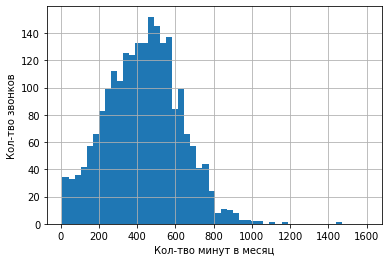

In [ ]:
smart_df['total_duration'].plot(kind = 'hist',bins = 50, range = (10, 1600), grid =True)
plt.xlabel('Кол-тво минут в месяц')
plt.ylabel('Кол-тво звонков')
plt.show()

1. <b>В данной гистограмме наблюдаются выбросы.
2. Заметим, что медиана и среднее близки, тем не менее гистограмма чуть скошена влево.
3. Узнаем характерный разброс, построим диаграмму размаха.</b>

(-15, 1600)

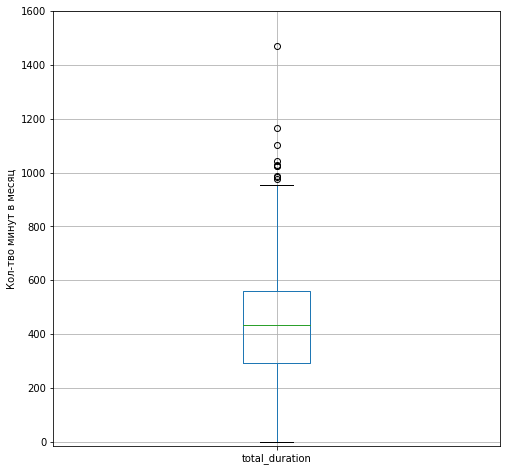

In [ ]:
smart_df.boxplot(['total_duration'], figsize = (8,8))
plt.ylabel('Кол-тво минут в месяц')
plt.ylim(-15, 1600)

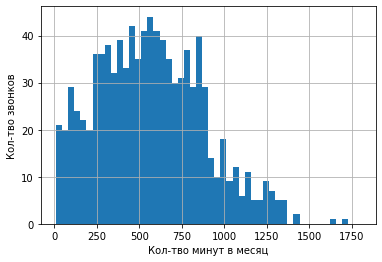

In [ ]:
ultra_df['total_duration'].plot(kind = 'hist',bins = 50, range = (10, 1800), grid =True)
plt.xlabel('Кол-тво минут в месяц')
plt.ylabel('Кол-тво звонков')
plt.show()

1. <b>В данной гистограмме наблюдаются выбросы.
2. Заметим, что медиана и среднее близки, тем не менее гистограмма скошена вправо
3. Узнаем характерный разброс, построим диаграмму размаха.
4. Все пользователи не успевают тратить минуты на звонки.</b>

(-15, 1800)

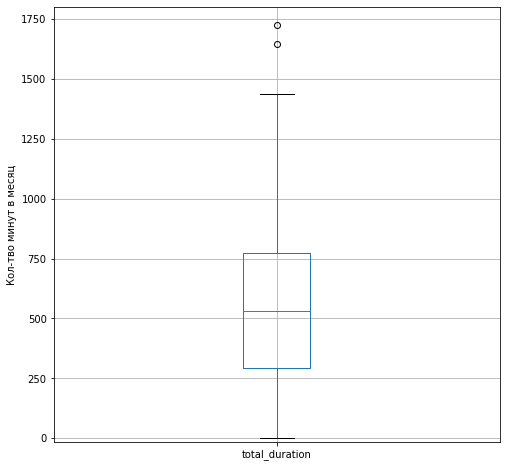

In [ ]:
ultra_df.boxplot(['total_duration'], figsize = (8,8))
plt.ylabel('Кол-тво минут в месяц')
plt.ylim(-15, 1800)

In [ ]:
# <coздадим функцию, чтобы избавиться от выбросов>
def section_query(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    section = data[(data[column] >= (q1 - 1.5 * iqr)) & (data[column] <= (q3 + 1.5 * iqr))]
    return section     

In [ ]:
smart_df = section_query(smart_df, 'total_duration')
ultra_df = section_query(ultra_df, 'total_duration')

In [ ]:
smart_df['total_duration'].describe()

count   2219.00
mean     426.52
std      190.09
min        0.00
25%      290.00
50%      434.00
75%      559.00
max      955.00
Name: total_duration, dtype: float64

In [ ]:
print(smart_df['total_duration'].var())

36135.692583235774


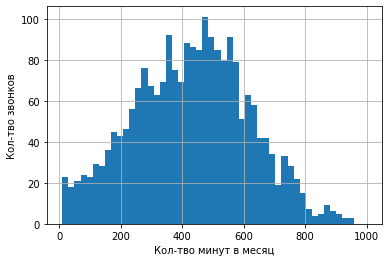

In [ ]:
smart_df['total_duration'].plot(kind = 'hist',bins = 50, range = (10, 1000), grid =True)
plt.xlabel('Кол-тво минут в месяц')
plt.ylabel('Кол-тво звонков')
plt.show()

<b>Пик наблюдается около 450, также гистрограмма немного скошена влево.</b>

(-15, 1000)

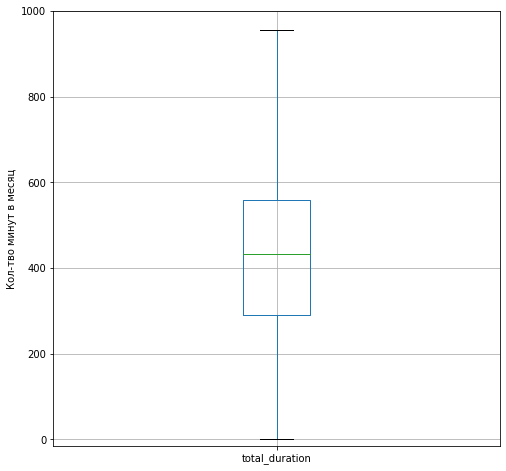

In [ ]:
smart_df.boxplot(['total_duration'], figsize = (8,8))
plt.ylabel('Кол-тво минут в месяц')
plt.ylim(-15, 1000)

In [ ]:
ultra_df['total_duration'].describe()

count    983.00
mean     538.45
std      321.93
min        0.00
25%      291.50
50%      531.00
75%      770.00
max     1437.00
Name: total_duration, dtype: float64

In [ ]:
print(ultra_df['total_duration'].var())

103637.31879010386


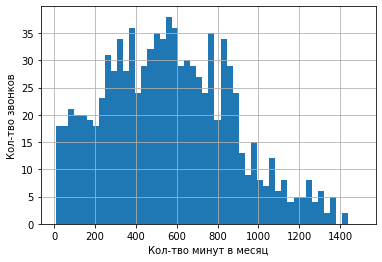

In [ ]:
ultra_df['total_duration'].plot(kind = 'hist',bins = 50, range = (10, 1500), grid =True)
plt.xlabel('Кол-тво минут в месяц')
plt.ylabel('Кол-тво звонков')
plt.show()

<b>Пик находится около 550</b>

(-15, 1500)

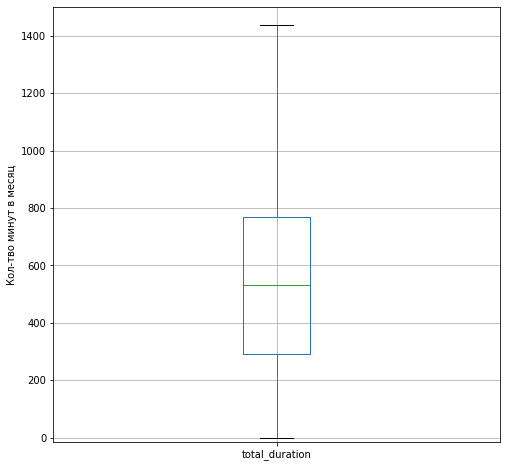

In [ ]:
ultra_df.boxplot(['total_duration'], figsize = (8,8))
plt.ylabel('Кол-тво минут в месяц')
plt.ylim(-15, 1500)

<b>Рассмотрим, сколько сообщений требуется пользователям каждого тарифа в месяц.</b>

In [ ]:
df.groupby('tariff').agg({'total_messages':['mean','median','var','std']})

total_messages                     
                 mean median     var   std
tariff                                    
smart           33.38  28.00  796.81 28.23
ultra           49.36  38.00 2285.27 47.80

In [ ]:
df.pivot_table(index='tariff',  
                 values=['total_duration', 'total_gb_used', 'total_messages'], 
                 aggfunc=['mean', 'std', 'var']).T.style.format('{:.2f}')

In [ ]:
smart_df['total_messages'].describe()

count   2219.00
mean      33.36
std       28.25
min        0.00
25%       10.00
50%       28.00
75%       51.00
max      143.00
Name: total_messages, dtype: float64

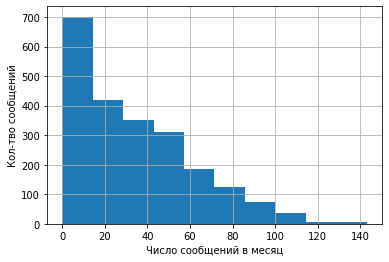

In [ ]:
smart_df['total_messages'].plot(kind = 'hist',bins = 10, grid =True)
plt.xlabel('Число сообщений в месяц')
plt.ylabel('Кол-тво сообщений')
plt.show()

<b>Наблюдаем, что гистограмма скошена вправо.</b>

(-15, 150)

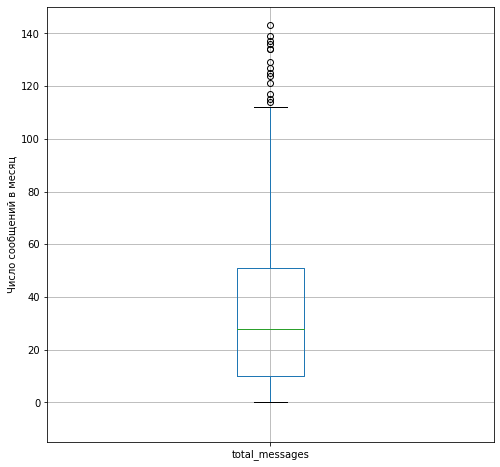

In [ ]:
smart_df.boxplot(['total_messages'], figsize = (8,8))
plt.ylabel('Число сообщений в месяц')
plt.ylim(-15, 150)

In [ ]:
ultra_df['total_messages'].describe()

count   983.00
mean     49.40
std      47.84
min       0.00
25%       6.00
50%      38.00
75%      79.00
max     224.00
Name: total_messages, dtype: float64

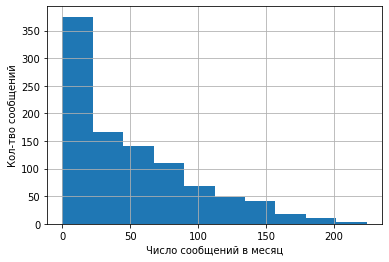

In [ ]:
ultra_df['total_messages'].plot(kind = 'hist',bins = 10, grid =True)
plt.xlabel('Число сообщений в месяц')
plt.ylabel('Кол-тво сообщений')
plt.show()

<b>Наблюдаем, что гистограмма скошена вправо.</b>

(-15, 225)

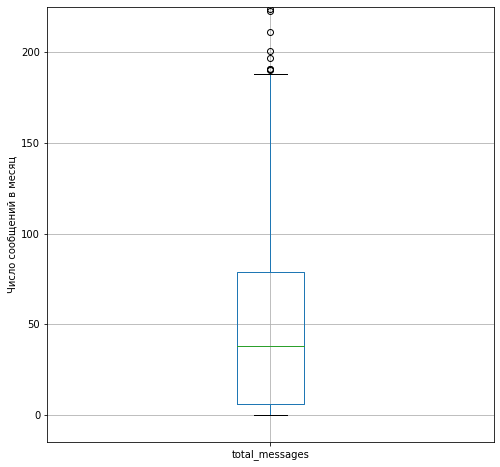

In [ ]:
ultra_df.boxplot(['total_messages'], figsize = (8,8))
plt.ylabel('Число сообщений в месяц')
plt.ylim(-15, 225)

<b>В обоих тарифах отправка сообщений не является популярной услугой, в Ultra вообще не доходят до порогового значения тарифа, в Smart около 75% укладываются в тариф.</b>

In [ ]:
smart_df = section_query(smart_df, 'total_messages')
ultra_df = section_query(ultra_df, 'total_messages')

In [ ]:
smart_df['total_messages'].describe()

count   2205.00
mean      32.76
std       27.30
min        0.00
25%       10.00
50%       28.00
75%       50.00
max      112.00
Name: total_messages, dtype: float64

In [ ]:
print(smart_df['total_messages'].var())

745.0703474614286


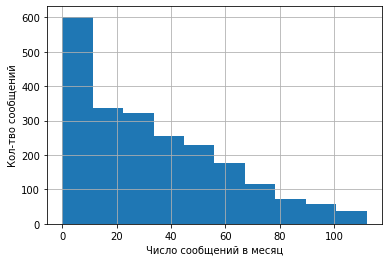

In [ ]:
smart_df['total_messages'].plot(kind = 'hist',bins = 10, grid =True)
plt.xlabel('Число сообщений в месяц')
plt.ylabel('Кол-тво сообщений')
plt.show()

(-15, 120)

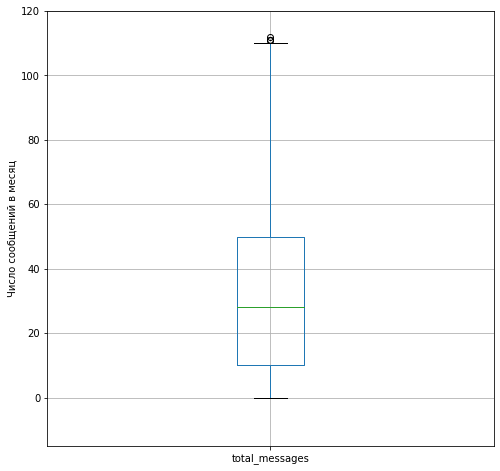

In [ ]:
smart_df.boxplot(['total_messages'], figsize = (8,8))
plt.ylabel('Число сообщений в месяц')
plt.ylim(-15, 120)

In [ ]:
ultra_df['total_messages'].describe()

count   975.00
mean     48.14
std      45.93
min       0.00
25%       6.00
50%      38.00
75%      78.00
max     188.00
Name: total_messages, dtype: float64

In [ ]:
print(ultra_df['total_messages'].var())

2109.658141420523


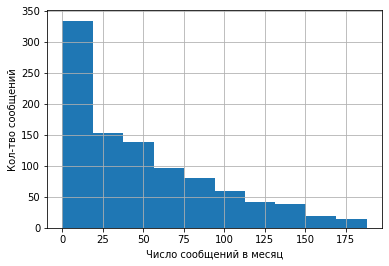

In [ ]:
ultra_df['total_messages'].plot(kind = 'hist',bins = 10, grid =True)
plt.xlabel('Число сообщений в месяц')
plt.ylabel('Кол-тво сообщений')
plt.show()

(-15, 200)

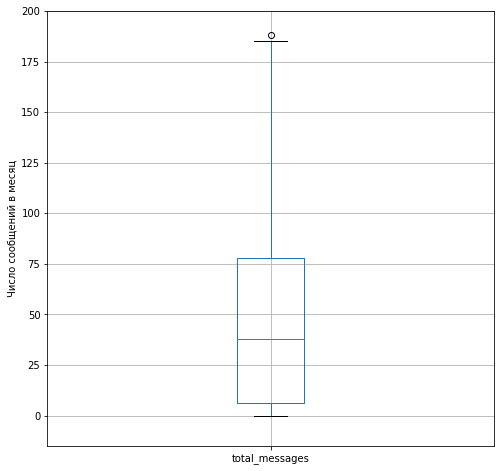

In [ ]:
ultra_df.boxplot(['total_messages'], figsize = (8,8))
plt.ylabel('Число сообщений в месяц')
plt.ylim(-15, 200)

<b>Рассмотрим, какой объем интернета требуется пользователям каждого тарифа в месяц.</b>

In [ ]:
df.groupby('tariff').agg({'total_gb_used':['mean','median','var','std']})

total_gb_used                  
                mean median   var  std
tariff                                
smart          15.85  16.14 32.95 5.74
ultra          19.03  18.87 97.21 9.86

In [ ]:
smart_df['total_gb_used'].describe()

count   2205.00
mean      15.81
std        5.71
min        0.00
25%       12.34
50%       16.10
75%       19.54
max       36.35
Name: total_gb_used, dtype: float64

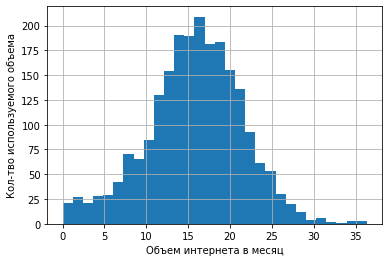

In [ ]:
smart_df['total_gb_used'].plot(kind = 'hist',bins = 30, grid =True)
plt.xlabel('Объем интернета в месяц')
plt.ylabel('Кол-тво используемого объема')
plt.show()

<b>Явно больше 50% пользователей выходят за рамки тарифа, т.е. привышают 15 Гб. Среднее и медиана практически одинаковые.</b>

(0, 40)

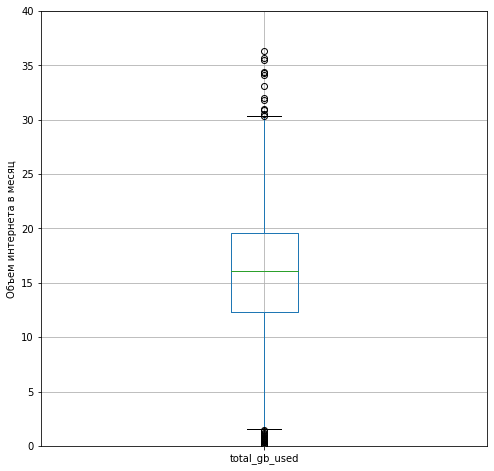

In [ ]:
smart_df.boxplot(['total_gb_used'], figsize = (8,8))
plt.ylabel('Объем интернета в месяц')
plt.ylim(0, 40)

In [ ]:
ultra_df['total_gb_used'].describe()

count   975.00
mean     18.97
std       9.82
min       0.00
25%      11.49
50%      18.84
75%      26.15
max      48.62
Name: total_gb_used, dtype: float64

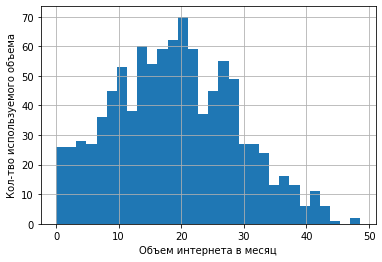

In [ ]:
ultra_df['total_gb_used'].plot(kind = 'hist',bins = 30, grid =True)
plt.xlabel('Объем интернета в месяц')
plt.ylabel('Кол-тво используемого объема')
plt.show()

<b>Около 75% пользователей не превышают тариф по интернету, пик находится около 20 Гб, стоит также отметить, что немалое количество пользователей вообще практически не используют интернет. Среднее и медиана практически одинаковые.</b>

(-5, 50)

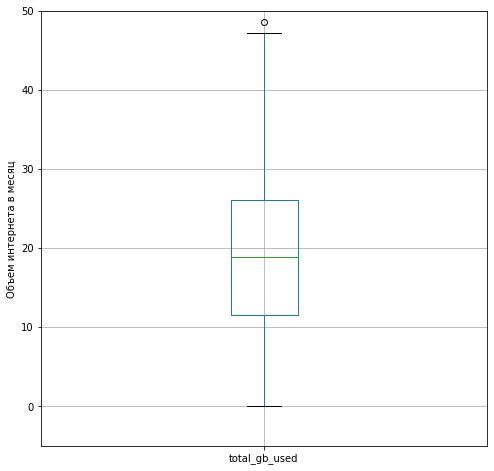

In [ ]:
ultra_df.boxplot(['total_gb_used'], figsize = (8,8))
plt.ylabel('Объем интернета в месяц')
plt.ylim(-5, 50)

In [ ]:
smart_df = section_query(smart_df, 'total_gb_used')
ultra_df = section_query(ultra_df, 'total_gb_used')

In [ ]:
smart_df['total_gb_used'].describe()

count   2169.00
mean      15.86
std        5.38
min        1.56
25%       12.46
50%       16.11
75%       19.53
max       30.33
Name: total_gb_used, dtype: float64

In [ ]:
print(smart_df['total_gb_used'].var())

28.90511983829023


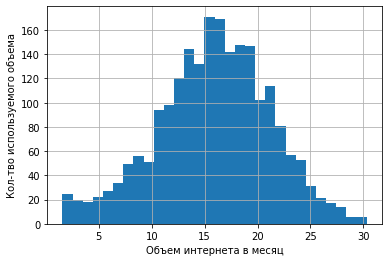

In [ ]:
smart_df['total_gb_used'].plot(kind = 'hist',bins = 30, grid =True)
plt.xlabel('Объем интернета в месяц')
plt.ylabel('Кол-тво используемого объема')
plt.show()

(0, 35)

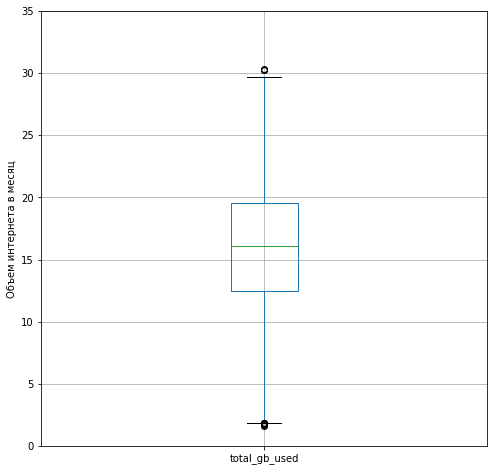

In [ ]:
smart_df.boxplot(['total_gb_used'], figsize = (8,8))
plt.ylabel('Объем интернета в месяц')
plt.ylim(0, 35)

In [ ]:
ultra_df['total_gb_used'].describe()

count   974.00
mean     18.94
std       9.78
min       0.00
25%      11.49
50%      18.83
75%      26.11
max      47.26
Name: total_gb_used, dtype: float64

In [ ]:
print(ultra_df['total_gb_used'].var())

95.71956354258455


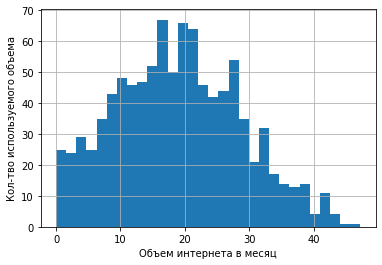

In [ ]:
ultra_df['total_gb_used'].plot(kind = 'hist',bins = 30, grid =True)
plt.xlabel('Объем интернета в месяц')
plt.ylabel('Кол-тво используемого объема')
plt.show()

(-5, 50)

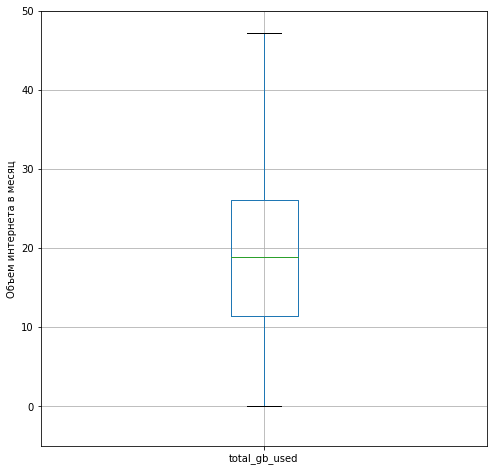

In [ ]:
ultra_df.boxplot(['total_gb_used'], figsize = (8,8))
plt.ylabel('Объем интернета в месяц')
plt.ylim(-5, 50)

<b>Рассмотрим какая выручка по каждому тарифу</b>

In [ ]:
print(smart_df['total_proceeds'].sum())

2648012.546875


In [ ]:
# <выручка за превышение тарифа>
print(smart_df['total_excess_tariff'].sum())

1455062.546875


In [ ]:
print(smart_df['total_proceeds'].sum() - smart_df['total_excess_tariff'].sum())

1192950.0


In [ ]:
smart_df['total_proceeds'].describe()

count   2169.00
mean    1220.84
std      726.07
min      550.00
25%      556.00
50%      982.62
75%     1665.06
max     4351.97
Name: total_proceeds, dtype: float64

In [ ]:
print(smart_df['total_proceeds'].var())

527183.03144258


In [ ]:
print(smart_df['total_proceeds'].value_counts())

550.00     531
604.00       7
568.00       7
673.00       6
814.00       6
          ... 
2224.38      1
1110.55      1
1989.24      1
735.05       1
928.00       1
Name: total_proceeds, Length: 1444, dtype: int64


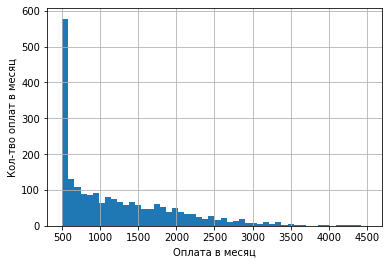

In [ ]:
smart_df['total_proceeds'].plot(kind = 'hist',bins = 50,range = (500, 4500), grid =True)
plt.xlabel('Оплата в месяц')
plt.ylabel('Кол-тво оплат в месяц')
plt.show()

<b>Немало пользователей  укладываются в тариф(в 550р.), но большинство превышают его. Наблюдается выручка не только с тарифа, но и с услуг сверх тарифного плана(примерно 52%). Общая сумма выручки выросла за счет превышения тарифа пользователями практически в 2 раза.</b>

In [ ]:
smart_df = section_query(smart_df, 'total_proceeds')

In [ ]:
smart_df['total_proceeds'].describe()

count   2147.00
mean    1195.73
std      685.04
min      550.00
25%      553.00
50%      975.17
75%     1639.16
max     3328.39
Name: total_proceeds, dtype: float64

In [ ]:
display(smart_df)

,user_id,month,total_duration,total_calls,total_messages,total_gb_used,age,churn_date,city,first_name,...,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_excess_tariff,total_proceeds
8,1001,11,444.00,59.00,0.00,18.02,41,NaT,Москва,Иван,...,smart,50,15.00,500,550,200,3,3,603.91,1153.91
9,1001,12,430.00,63.00,0.00,13.72,41,NaT,Москва,Иван,...,smart,50,15.00,500,550,200,3,3,0.00,550.00
10,1002,6,118.00,15.00,4.00,10.62,59,NaT,Стерлитамак,Евгений,...,smart,50,15.00,500,550,200,3,3,0.00,550.00
11,1002,7,219.00,26.00,11.00,17.19,59,NaT,Стерлитамак,Евгений,...,smart,50,15.00,500,550,200,3,3,437.70,987.70
12,1002,8,294.00,42.00,13.00,19.87,59,NaT,Стерлитамак,Евгений,...,smart,50,15.00,500,550,200,3,3,974.02,1524.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208,1489,8,0.00,0.00,17.00,10.81,35,NaT,Санкт-Петербург,Павел,...,smart,50,15.00,500,550,200,3,3,0.00,550.00
3209,1489,9,0.00,0.00,32.00,16.83,35,NaT,Санкт-Петербург,Павел,...,smart,50,15.00,500,550,200,3,3,365.62,915.62
3210,1489,10,0.00,0.00,21.00,19.13,35,NaT,Санкт-Петербург,Павел,...,smart,50,15.00,500,550,200,3,3,825.78,1375.78
3211,1489,11,0.00,0.00,20.00,17.11,35,NaT,Санкт-Петербург,Павел,...,smart,50,15.00,500,550,200,3,3,421.09,971.09


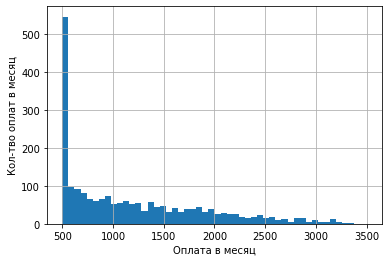

In [ ]:
smart_df['total_proceeds'].plot(kind = 'hist',bins = 50,range = (500, 3500), grid =True)
plt.xlabel('Оплата в месяц')
plt.ylabel('Кол-тво оплат в месяц')
plt.show()

In [ ]:
print(ultra_df['total_proceeds'].sum())

2002144.3359375


In [ ]:
# <выручка за превышение тарифа>
print(ultra_df['total_excess_tariff'].sum())

102844.3359375


In [ ]:
print(ultra_df['total_proceeds'].sum() - ultra_df['total_excess_tariff'].sum())

1899300.0


In [ ]:
ultra_df['total_proceeds'].describe()

count    974.00
mean    2055.59
std      342.49
min     1950.00
25%     1950.00
50%     1950.00
75%     1950.00
max     4539.11
Name: total_proceeds, dtype: float64

In [ ]:
print(ultra_df['total_proceeds'].var())

117300.62985336149


In [ ]:
print(ultra_df['total_proceeds'].value_counts())

1950.00    845
2916.94      1
2236.96      1
3644.97      1
2508.98      1
          ... 
2606.98      1
2227.00      1
2683.01      1
2995.02      1
3802.15      1
Name: total_proceeds, Length: 130, dtype: int64


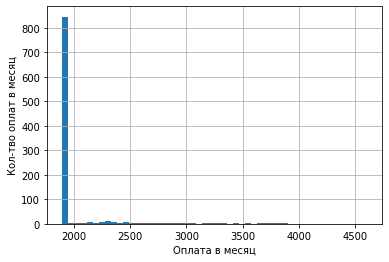

In [ ]:
ultra_df['total_proceeds'].plot(kind = 'hist',bins = 50,range = (1900, 4600), grid =True)
plt.xlabel('Оплата в месяц')
plt.ylabel('Кол-тво оплат в месяц')
plt.show()

<b>Выручка идет в основном с тарифа, с услуг сверх тарифного плана выручка маловата, примерно 5%.</b>

In [ ]:
ultra_df = section_query(ultra_df, 'total_proceeds')

In [ ]:
ultra_df['total_proceeds'].describe()

count    845.00
mean    1950.00
std        0.00
min     1950.00
25%     1950.00
50%     1950.00
75%     1950.00
max     1950.00
Name: total_proceeds, dtype: float64

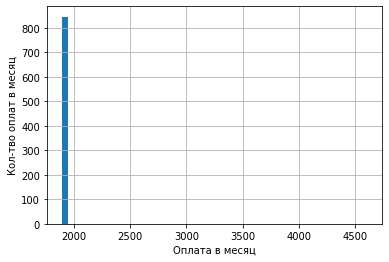

In [ ]:
ultra_df['total_proceeds'].plot(kind = 'hist',bins = 50,range = (1900, 4600), grid =True)
plt.xlabel('Оплата в месяц')
plt.ylabel('Кол-тво оплат в месяц')
plt.show()

### Вывод:
1. В обоих тарифах услуга отправки сообщений не так популярна, большинство пользователей укладывается в тариф. Эта закономерность логична для современного мира, появилось большое количество соцсетей и мессенджеров, которые работаю через интернет.
2. В тарифе smart больше 50% пользователей выходят за рамки тарифа, для этих пользователей скорее 15 Гб трафика не хватает. В ultra дела обстоят лучше, большинство пользователей укладываются в тариф. Пик около 20 Гб.
3. Пользователям тарифа ultra в полне хватает количество минут для звонков, никто не превышал лимит использования. В тарифе smart около 50% лимит по минутам превысили.
4. Около 52% от всей выручки в тарифе smart состоит из услуг сферх тарифного плана. В ultra наоборот, вся выручка в основном с ежемесячной платы тарифа. 

## Шаг 4. Проверяем гипотезы

<ul style="border:solid black 2px; padding: 20px">
    <li>средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;</li>
</ul> 

<b>Так как у нас генеральных совокупности две, и нам необходимо сопоставить их средние, то применим гипотезу о равенстве средних двух генеральных совокупностей.</b>

<b> Сформулируем гипотезы:
    <ul>
        <li>H0: средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается;</li>
        <li>H1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;</li>
    </ul> 
</b>

In [ ]:
display(smart_df)

,user_id,month,total_duration,total_calls,total_messages,total_gb_used,age,churn_date,city,first_name,...,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_excess_tariff,total_proceeds
8,1001,11,444.00,59.00,0.00,18.02,41,NaT,Москва,Иван,...,smart,50,15.00,500,550,200,3,3,603.91,1153.91
9,1001,12,430.00,63.00,0.00,13.72,41,NaT,Москва,Иван,...,smart,50,15.00,500,550,200,3,3,0.00,550.00
10,1002,6,118.00,15.00,4.00,10.62,59,NaT,Стерлитамак,Евгений,...,smart,50,15.00,500,550,200,3,3,0.00,550.00
11,1002,7,219.00,26.00,11.00,17.19,59,NaT,Стерлитамак,Евгений,...,smart,50,15.00,500,550,200,3,3,437.70,987.70
12,1002,8,294.00,42.00,13.00,19.87,59,NaT,Стерлитамак,Евгений,...,smart,50,15.00,500,550,200,3,3,974.02,1524.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208,1489,8,0.00,0.00,17.00,10.81,35,NaT,Санкт-Петербург,Павел,...,smart,50,15.00,500,550,200,3,3,0.00,550.00
3209,1489,9,0.00,0.00,32.00,16.83,35,NaT,Санкт-Петербург,Павел,...,smart,50,15.00,500,550,200,3,3,365.62,915.62
3210,1489,10,0.00,0.00,21.00,19.13,35,NaT,Санкт-Петербург,Павел,...,smart,50,15.00,500,550,200,3,3,825.78,1375.78
3211,1489,11,0.00,0.00,20.00,17.11,35,NaT,Санкт-Петербург,Павел,...,smart,50,15.00,500,550,200,3,3,421.09,971.09


In [ ]:
display(ultra_df)

,user_id,month,total_duration,total_calls,total_messages,total_gb_used,age,churn_date,city,first_name,...,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_excess_tariff,total_proceeds
0,1000,5,164.00,22.00,22.00,2.20,52,NaT,Краснодар,Рафаил,...,ultra,1000,30.00,3000,1950,150,1,1,0.00,1950.00
1,1000,6,187.00,43.00,60.00,22.71,52,NaT,Краснодар,Рафаил,...,ultra,1000,30.00,3000,1950,150,1,1,0.00,1950.00
2,1000,7,346.00,47.00,75.00,13.69,52,NaT,Краснодар,Рафаил,...,ultra,1000,30.00,3000,1950,150,1,1,0.00,1950.00
3,1000,8,418.00,52.00,81.00,13.74,52,NaT,Краснодар,Рафаил,...,ultra,1000,30.00,3000,1950,150,1,1,0.00,1950.00
4,1000,9,478.00,58.00,57.00,14.24,52,NaT,Краснодар,Рафаил,...,ultra,1000,30.00,3000,1950,150,1,1,0.00,1950.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204,1473,9,0.00,0.00,19.00,16.90,18,NaT,Красноярск,Николай,...,ultra,1000,30.00,3000,1950,150,1,1,0.00,1950.00
3205,1473,10,0.00,0.00,20.00,13.38,18,NaT,Красноярск,Николай,...,ultra,1000,30.00,3000,1950,150,1,1,0.00,1950.00
3206,1473,11,0.00,0.00,14.00,21.18,18,NaT,Красноярск,Николай,...,ultra,1000,30.00,3000,1950,150,1,1,0.00,1950.00
3207,1473,12,0.00,0.00,20.00,18.00,18,NaT,Красноярск,Николай,...,ultra,1000,30.00,3000,1950,150,1,1,0.00,1950.00


In [ ]:
smart_df = smart_df['total_proceeds']

In [ ]:
ultra_df = ultra_df['total_proceeds']

In [ ]:
alpha = 0.05

In [ ]:
results = st.ttest_ind(smart_df, ultra_df)

In [ ]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.6130032821416825e-193
Отвергаем нулевую гипотезу


<b>Присутствуют значимые различия между выборками.</b>

<ul style="border:solid black 2px; padding: 20px">
    <li>средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;</li>
</ul> 

<b> Сформулируем гипотезы:
    <ul>
        <li>H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов;</li>
        <li>H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;</li>
    </ul> 
</b>

In [ ]:
display(df['city'].value_counts())

Москва             611
Санкт-Петербург    270
Новосибирск         98
Уфа                 95
Краснодар           86
                  ... 
Сургут               6
Нижневартовск        6
Кемерово             5
Химки                5
Иваново              2
Name: city, Length: 76, dtype: int64

In [ ]:
def city_group(city):
    if 'Москва' in city:
        return 'Москва'
    else:
        return 'Другой регион'
    return 'Ошибка'

In [ ]:
#<создадим столбец и проверим>
df['city_group'] = df['city'].apply(city_group)
display(df)

,user_id,month,total_duration,total_calls,total_messages,total_gb_used,age,churn_date,city,first_name,...,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_excess_tariff,total_proceeds,city_group
0,1000,5,164.00,22.00,22.00,2.20,52,NaT,Краснодар,Рафаил,...,1000,30.00,3000,1950,150,1,1,0.00,1950.00,Другой регион
1,1000,6,187.00,43.00,60.00,22.71,52,NaT,Краснодар,Рафаил,...,1000,30.00,3000,1950,150,1,1,0.00,1950.00,Другой регион
2,1000,7,346.00,47.00,75.00,13.69,52,NaT,Краснодар,Рафаил,...,1000,30.00,3000,1950,150,1,1,0.00,1950.00,Другой регион
3,1000,8,418.00,52.00,81.00,13.74,52,NaT,Краснодар,Рафаил,...,1000,30.00,3000,1950,150,1,1,0.00,1950.00,Другой регион
4,1000,9,478.00,58.00,57.00,14.24,52,NaT,Краснодар,Рафаил,...,1000,30.00,3000,1950,150,1,1,0.00,1950.00,Другой регион
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.00,0.00,32.00,16.83,35,NaT,Санкт-Петербург,Павел,...,50,15.00,500,550,200,3,3,365.62,915.62,Другой регион
3210,1489,10,0.00,0.00,21.00,19.13,35,NaT,Санкт-Петербург,Павел,...,50,15.00,500,550,200,3,3,825.78,1375.78,Другой регион
3211,1489,11,0.00,0.00,20.00,17.11,35,NaT,Санкт-Петербург,Павел,...,50,15.00,500,550,200,3,3,421.09,971.09,Другой регион
3212,1489,12,0.00,0.00,35.00,16.93,35,NaT,Санкт-Петербург,Павел,...,50,15.00,500,550,200,3,3,386.91,936.91,Другой регион


In [ ]:
Moscow_df = df.query('city_group == "Москва"')
display(Moscow_df)

,user_id,month,total_duration,total_calls,total_messages,total_gb_used,age,churn_date,city,first_name,...,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_excess_tariff,total_proceeds,city_group
8,1001,11,444.00,59.00,0.00,18.02,41,NaT,Москва,Иван,...,50,15.00,500,550,200,3,3,603.91,1153.91,Москва
9,1001,12,430.00,63.00,0.00,13.72,41,NaT,Москва,Иван,...,50,15.00,500,550,200,3,3,0.00,550.00,Москва
17,1003,8,392.00,55.00,37.00,8.37,23,NaT,Москва,Белла,...,1000,30.00,3000,1950,150,1,1,0.00,1950.00,Москва
18,1003,9,990.00,134.00,91.00,12.19,23,NaT,Москва,Белла,...,1000,30.00,3000,1950,150,1,1,0.00,1950.00,Москва
19,1003,10,866.00,108.00,83.00,14.43,23,NaT,Москва,Белла,...,1000,30.00,3000,1950,150,1,1,0.00,1950.00,Москва
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,1490,9,335.00,44.00,48.00,14.49,30,NaT,Москва,Радомир,...,50,15.00,500,550,200,3,3,0.00,550.00,Москва
3120,1490,10,320.00,42.00,45.00,20.21,30,NaT,Москва,Радомир,...,50,15.00,500,550,200,3,3,1041.02,1591.02,Москва
3121,1490,11,289.00,38.00,47.00,18.29,30,NaT,Москва,Радомир,...,50,15.00,500,550,200,3,3,658.79,1208.79,Москва
3122,1490,12,297.00,42.00,46.00,15.44,30,NaT,Москва,Радомир,...,50,15.00,500,550,200,3,3,87.11,637.11,Москва


In [ ]:
other_region_df = df.query('city_group == "Другой регион"')
display(other_region_df)

,user_id,month,total_duration,total_calls,total_messages,total_gb_used,age,churn_date,city,first_name,...,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_excess_tariff,total_proceeds,city_group
0,1000,5,164.00,22.00,22.00,2.20,52,NaT,Краснодар,Рафаил,...,1000,30.00,3000,1950,150,1,1,0.00,1950.00,Другой регион
1,1000,6,187.00,43.00,60.00,22.71,52,NaT,Краснодар,Рафаил,...,1000,30.00,3000,1950,150,1,1,0.00,1950.00,Другой регион
2,1000,7,346.00,47.00,75.00,13.69,52,NaT,Краснодар,Рафаил,...,1000,30.00,3000,1950,150,1,1,0.00,1950.00,Другой регион
3,1000,8,418.00,52.00,81.00,13.74,52,NaT,Краснодар,Рафаил,...,1000,30.00,3000,1950,150,1,1,0.00,1950.00,Другой регион
4,1000,9,478.00,58.00,57.00,14.24,52,NaT,Краснодар,Рафаил,...,1000,30.00,3000,1950,150,1,1,0.00,1950.00,Другой регион
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208,1489,8,0.00,0.00,17.00,10.81,35,NaT,Санкт-Петербург,Павел,...,50,15.00,500,550,200,3,3,0.00,550.00,Другой регион
3209,1489,9,0.00,0.00,32.00,16.83,35,NaT,Санкт-Петербург,Павел,...,50,15.00,500,550,200,3,3,365.62,915.62,Другой регион
3210,1489,10,0.00,0.00,21.00,19.13,35,NaT,Санкт-Петербург,Павел,...,50,15.00,500,550,200,3,3,825.78,1375.78,Другой регион
3211,1489,11,0.00,0.00,20.00,17.11,35,NaT,Санкт-Петербург,Павел,...,50,15.00,500,550,200,3,3,421.09,971.09,Другой регион


In [ ]:
Moscow_df = section_query(Moscow_df, 'total_proceeds')
other_region_df = section_query(other_region_df, 'total_proceeds')

In [ ]:
Moscow_df = Moscow_df['total_proceeds']

In [ ]:
other_region_df = other_region_df['total_proceeds']

In [ ]:
results = st.ttest_ind(Moscow_df, other_region_df)

In [ ]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.3133354497229466
Не получилось отвергнуть нулевую гипотезу


<b>Полученное значение p-value говорит о том, что хотя средняя выручка из Москвы и Других регионов неодинакова, но с вероятностью примерно 31% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними выручками.</b> 


## Общий вывод

1. С точки зрения прибыли, компании нужно скорректировать рекламный бюджет по отношению к тарифу ultra. Если достигнуть показателей по количеству пользователей как у тарифа smart в 2018, то выручка будет намного больше, чем у smart, чуть ли не в 2 раза.
2. Есть риск, что тариф ultra будет сложно продать, так как он довольно таки дорогой, но там пользователь может ни в чем себе не отказывать(не задумываться, что чего-то не хватит). В тарифе smart пользователям не хватает минут и Гб, в среднем тратят тысячу рублей, но готовы оставаться на этом тарифе(готовы залезать в сверх тариф).
3. Можно рассмотреть и еще один вариант. Для тарифа smart сделать возможность подключить "безлимитный интернет на соцсети" n рублей, что привлечет внимание большего числа пользователей, а также возможно задержит пользователей, которые уже пользуются данным тарифом.
4. Смс сообщения ни в одном из тарифов не пользуются популярностью.
5. Тарифы приносят разные выручки, значимые различия есть, тем не менее между Москвой и Другими регионами делать вывод о значимом различии между средними выручками не стоит. 

<b>Рекомендации по совершенствованию системы:</b>
1. Реализовать автоматичесткое округление вверх значения минут и мегабайтов.
2. Возможно в столбец <b><i>'churn_date'</i></b> вместо пропусков выставлять ближайшую дату окончания тарифа.
3. Реализовать фильтрацию показателей по месяцу, году или по тарифам в целом.